In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from constants import CLASSES
from pathlib import Path
from utils import train_net

In [2]:
# for colab
!wget -x --load-cookies cookies.txt "https://www.kaggle.com/deadskull7/fer2013/download" -O fer2013.zip
!python unpack_data.py

--2020-04-11 15:03:33--  https://www.kaggle.com/deadskull7/fer2013/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-data-sets/28577/36420/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586876613&Signature=kZd4G%2FkLp1wC9VrYOp2nK7ZQaKklintswcLBvQ1rOxmrry6VbVwcVSPrQX5BqD7d3byHTR%2BrE7N26llDLJz81U8WJ0b%2F1cNKuvWie8Frk%2F9aBCAC9JsVYSUr%2B%2ByzIYL7VtMODCtS5vU0k2%2Fd2CIe2dZbSZKPgD2RMkphbAC6tWtwGCBIiX4z%2FQ77ZjfFzfJzcrnpxTPObF8AAM2ARut2iVDxZADT1CF4x5qSn2CaSZIvozNgRqYmwo002TFVJlD4ROEqTpmBNNLUqdmh35L7nQAsvaVFPBOQheTC8OAunr%2BqHBCXvCXMG2pjh29tQOYYTVxkl6lNZGuwLDnHHs0fgg%3D%3D&response-content-disposition=attachment%3B+filename%3Dfer2013.zip [following]
--2020-04-11 15:03:33--  https://storage.googleapis.com/kaggle-data-sets/28577/36420/bundle/archive.zip?GoogleA

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [0]:
transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

transform_augment = transforms.Compose(
    [
     transforms.Grayscale(),
     transforms.RandomHorizontalFlip(),
     transforms.ColorJitter(brightness=0.2),
     transforms.RandomAffine(15, translate=(0.05, 0.05), scale=(0.9, 1.1)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
    ]
)

In [0]:
trainset = torchvision.datasets.ImageFolder(root='./data/train', transform=transform_augment)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

In [0]:
valset = torchvision.datasets.ImageFolder(root='./data/val', transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=4,
                                          shuffle=False, num_workers=2)

In [0]:
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, bias=False)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 18, 3, bias=False)
        self.bn2 = nn.BatchNorm2d(18)
        self.pool = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(18, 36, 3, bias=False)
        self.bn3 = nn.BatchNorm2d(36)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(36 * 10 * 10, 100)
        self.fc2 = nn.Linear(100, 7)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.bn3(x)
        x = x.view(-1, 36 * 10 * 10)
        x = self.dropout(x)
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [0]:
net = CustomNet()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3, threshold=0.001)
#scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=3e-4, max_lr=1e-3, cycle_momentum=False, step_size_up=449)

[1,   449] train_loss: 1.415, val_loss: 1.278, val_acc: 0.511
[2,   449] train_loss: 1.405, val_loss: 1.275, val_acc: 0.512
[3,   449] train_loss: 1.402, val_loss: 1.268, val_acc: 0.513
[4,   449] train_loss: 1.392, val_loss: 1.251, val_acc: 0.527
[5,   449] train_loss: 1.391, val_loss: 1.260, val_acc: 0.518
[6,   449] train_loss: 1.376, val_loss: 1.238, val_acc: 0.526
[7,   449] train_loss: 1.376, val_loss: 1.234, val_acc: 0.536
[8,   449] train_loss: 1.362, val_loss: 1.226, val_acc: 0.536
[9,   449] train_loss: 1.363, val_loss: 1.228, val_acc: 0.533
[10,   449] train_loss: 1.354, val_loss: 1.226, val_acc: 0.534
[11,   449] train_loss: 1.351, val_loss: 1.222, val_acc: 0.539
[12,   449] train_loss: 1.350, val_loss: 1.208, val_acc: 0.543
[13,   449] train_loss: 1.349, val_loss: 1.209, val_acc: 0.540
[14,   449] train_loss: 1.343, val_loss: 1.206, val_acc: 0.544
[15,   449] train_loss: 1.338, val_loss: 1.202, val_acc: 0.541
[16,   449] train_loss: 1.339, val_loss: 1.199, val_acc: 0.541
[

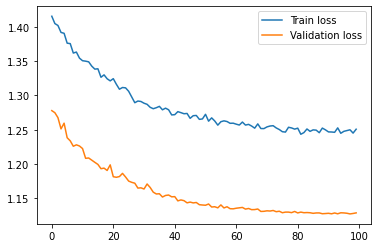

In [11]:
train_net(net, trainloader, valloader, criterion, optimizer, device, 
          num_epochs=100, lr_scheduler=scheduler, eval_period=len(trainloader))

In [0]:
Path('weights').mkdir(exist_ok=True)
PATH = 'weights/custom_net.pth'
torch.save(net.state_dict(), PATH)

### Evaluating

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [14]:
net = CustomNet()
net.load_state_dict(torch.load(PATH))
net.to(device)
net.eval()

CustomNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(18, 36, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3600, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=7, bias=True)
)

In [0]:
testset = torchvision.datasets.ImageFolder(root='./data/test', transform=transform)
testloader = torch.utils.data.DataLoader(valset, batch_size=4,
                                          shuffle=False, num_workers=2)

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on test images: 57 %


In [17]:
class_correct = [0. for i in range(len(CLASSES))]
class_total = [0. for i in range(len(CLASSES))]
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).reshape(1, -1)
        for i in range(c.size()[1]):
            label = labels[i].item()
            class_correct[label] += c[0, i].item()
            class_total[label] += 1


for i in range(len(CLASSES)):
    print('Accuracy of %5s : %2d %%' % (
        CLASSES[i], 100 * class_correct[i] / class_total[i]))

Accuracy of angry : 41 %
Accuracy of disgust : 26 %
Accuracy of  fear : 24 %
Accuracy of happy : 83 %
Accuracy of   sad : 47 %
Accuracy of surprise : 74 %
Accuracy of neutral : 57 %
